In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, "EIN" and "NAME"
application_df = application_df.drop(["EIN", "NAME","STATUS"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [4]:
# Number of unique values in each column.

application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df["APPLICATION_TYPE"].value_counts()
application_count


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = list(application_count.loc[application_count < 200].index)

application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [7]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app,"Other")

# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df["CLASSIFICATION"].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count.loc[classification_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Look at INCOME_AMT value counts for binning
income_count = application_df["INCOME_AMT"].value_counts()
income_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [12]:
temp = list(income_count.loc[income_count < 499999].index)

In [13]:
# Bin income with million value together
income_amt_to_replace = [i for i in  temp if "M" in i]
income_amt_to_replace

['1M-5M', '10M-50M', '5M-10M', '50M+']

In [14]:
# Replace in dataframe
for app in income_amt_to_replace:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(app,"1M+")

# Check to make sure binning was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M+               1519
1-9999             728
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [15]:
# As is in SynapticBoost Example
# Determine which ASK_AMT data points are outside of the 1.5*IQR range
amounts = application_df["ASK_AMT"].sort_values()
quartiles = np.quantile(amounts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [print(j) if j < lower_bound or j > upper_bound else next for j in amounts]

11886
11899
11901
11912
11917
11918
11935
11975
11983
12026
12049
12084
12089
12096
12097
12116
12127
12135
12140
12173
12174
12178
12184
12194
12213
12216
12224
12238
12238
12251
12269
12270
12285
12311
12316
12341
12361
12375
12402
12422
12424
12426
12452
12453
12465
12470
12486
12500
12506
12509
12512
12514
12544
12584
12584
12622
12640
12647
12654
12663
12666
12673
12686
12695
12722
12726
12744
12753
12753
12759
12763
12765
12779
12800
12829
12833
12860
12864
12872
12889
12908
12909
12948
12953
12983
12994
13010
13034
13035
13041
13057
13063
13070
13071
13076
13098
13119
13158
13163
13179
13182
13189
13201
13208
13262
13264
13288
13291
13303
13310
13312
13315
13322
13334
13341
13345
13366
13370
13371
13389
13420
13420
13422
13446
13464
13495
13499
13499
13501
13507
13541
13546
13564
13600
13637
13658
13676
13681
13681
13682
13685
13697
13704
13758
13787
13796
13799
13800
13821
13823
13831
13831
13844
13851
13852
13855
13862
13880
13898
13898
13903
13927
13931
13932
13947
13958
1398

106053
106069
106141
106237
106259
106351
106438
106453
106471
106571
106592
106670
106711
106748
106814
106866
107000
107120
107163
107318
107326
107336
107364
107374
107390
107397
107484
107510
107523
107562
107588
107637
107645
107647
107768
107944
107965
108128
108176
108178
108180
108245
108288
108304
108346
108371
108382
108414
108434
108523
108532
108564
108566
108590
108596
108665
108685
108820
108920
108972
109088
109239
109286
109640
109656
109661
109679
109886
109978
110024
110182
110212
110251
110614
110885
110946
110988
111034
111192
111225
111266
111443
111470
111480
111514
111608
111769
111823
112058
112177
112192
112209
112262
112310
112362
112372
112386
112417
112434
112883
112939
113031
113080
113083
113260
113431
113499
113505
113557
113659
113665
113728
113861
113946
114040
114142
114155
114266
114398
114603
114615
114632
114666
114797
114864
114908
114955
114990
115044
115332
115352
115368
115429
115459
115467
115673
115703
115891
115901
115955
116018
116059
116093

2539738
2542399
2543496
2547359
2550743
2551172
2552985
2555381
2557153
2558904
2583546
2585687
2587409
2588193
2592755
2594355
2600106
2609289
2611934
2626011
2630232
2631396
2641513
2642840
2644916
2666776
2681491
2693627
2705160
2705244
2714599
2719198
2722142
2722313
2726901
2731369
2731896
2747868
2750346
2750808
2751174
2755062
2766059
2770474
2773500
2773997
2777658
2791183
2791345
2792629
2793433
2803638
2808139
2811429
2811704
2812677
2822776
2823047
2827749
2828767
2840284
2848099
2848886
2881515
2887949
2888182
2899332
2899849
2901651
2908673
2914580
2918799
2919956
2921781
2933295
2935925
2941308
2948244
2949070
2956854
2960037
2960779
2973053
2980175
2983733
2989106
2989328
2996256
3006230
3012564
3013827
3021323
3032675
3032690
3045352
3050446
3060345
3072903
3074030
3084129
3098590
3100507
3104525
3116441
3116825
3129743
3134277
3140072
3143379
3144439
3149430
3155393
3156412
3160469
3163462
3163706
3175628
3184991
3189005
3189807
3193719
3197302
3206307
3209786
3209812


In [16]:
# Trim records with outlier ASK_AMT values
application_df = application_df[application_df.ASK_AMT < 11886]
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
#  CODE GOES HERE
app_dummies = pd.get_dummies(application_df)
print(app_dummies.columns)
app_dummies

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_1M+', 'INCOME_AMT_25000-99999',
     

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M+,INCOME_AMT_25000-99999,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6692,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,5000,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9,5000,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,5000,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34294,5000,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34295,5000,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34296,5000,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Split our preprocessed data into our features and target arrays
# CODE GOES HERE
y = app_dummies["IS_SUCCESSFUL"].values
X = app_dummies.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
## Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# 
input_feat = X_train_scaled.shape[1]
nn = tf.keras.models.Sequential()

# First hidden layer
# 
nn.add(tf.keras.layers.Dense(units=333, activation="relu", input_dim=input_feat))

# Second hidden layer
# 
nn.add(tf.keras.layers.Dense(units=666, activation="relu"))

# # Third hidden layer
# # 
nn.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

# Output layer
# 
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
# 
nn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 333)               13320     
_________________________________________________________________
dense_9 (Dense)              (None, 666)               222444    
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 2001      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 237,769
Trainable params: 237,769
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
# CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Create a callback that saves the model"s weights every five epochs
mc = tf.keras.callbacks.ModelCheckpoint("Weights/Optimization/weights{epoch:08d}.h5", save_weights_only=True, period=5)

In [31]:
# Train the model
# CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, callbacks=[mc], epochs=100)

Epoch 1/100
612/612 [==============================] - 0s 640us/step - loss: 0.6056 - accuracy: 0.7278
Epoch 2/100
612/612 [==============================] - 0s 632us/step - loss: 0.5641 - accuracy: 0.7450
Epoch 3/100
612/612 [==============================] - 0s 634us/step - loss: 0.5484 - accuracy: 0.7456
Epoch 4/100
612/612 [==============================] - 0s 637us/step - loss: 0.5413 - accuracy: 0.7499
Epoch 5/100
612/612 [==============================] - 0s 632us/step - loss: 0.5389 - accuracy: 0.7499
Epoch 6/100
612/612 [==============================] - 0s 633us/step - loss: 0.5371 - accuracy: 0.7502
Epoch 7/100
612/612 [==============================] - 0s 634us/step - loss: 0.5367 - accuracy: 0.7502
Epoch 8/100
612/612 [==============================] - 0s 642us/step - loss: 0.5356 - accuracy: 0.7508
Epoch 9/100
612/612 [==============================] - 0s 633us/step - loss: 0.5350 - accuracy: 0.7519
Epoch 10/100
612/612 [==============================] - 0s 648us/step - l

612/612 [==============================] - 0s 664us/step - loss: 0.5320 - accuracy: 0.7544
Epoch 80/100
612/612 [==============================] - 0s 690us/step - loss: 0.5325 - accuracy: 0.7540
Epoch 81/100
612/612 [==============================] - 0s 666us/step - loss: 0.5376 - accuracy: 0.7539
Epoch 82/100
612/612 [==============================] - 0s 632us/step - loss: 0.5369 - accuracy: 0.7517
Epoch 83/100
612/612 [==============================] - 0s 647us/step - loss: 0.5343 - accuracy: 0.7524
Epoch 84/100
612/612 [==============================] - 0s 635us/step - loss: 0.5334 - accuracy: 0.7536
Epoch 85/100
612/612 [==============================] - 0s 657us/step - loss: 0.5334 - accuracy: 0.7535
Epoch 86/100
612/612 [==============================] - 0s 659us/step - loss: 0.5360 - accuracy: 0.7523
Epoch 87/100
612/612 [==============================] - 0s 651us/step - loss: 0.5345 - accuracy: 0.7530
Epoch 88/100
612/612 [==============================] - 0s 656us/step - loss:

In [32]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


204/204 - 0s - loss: 0.5444 - accuracy: 0.7468
Loss: 0.5444251894950867, Accuracy: 0.7467811107635498


**Accuracy:75%
Loss:55%

<AxesSubplot:>

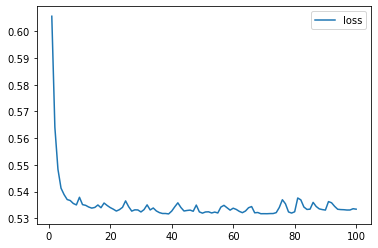

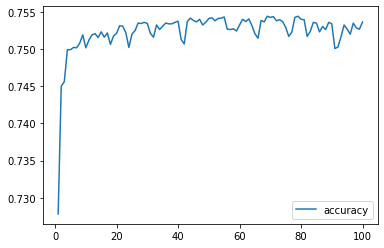

In [33]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")




In [34]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization3.h5")